# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

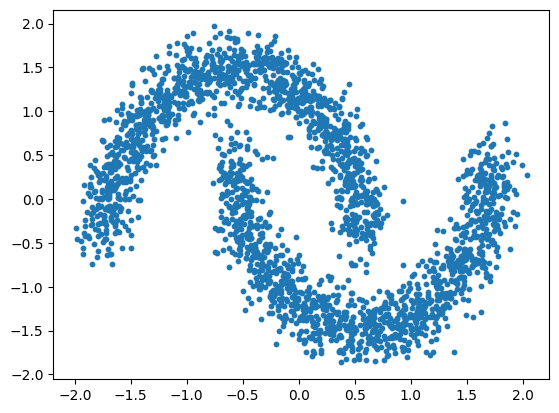

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [22]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 1,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 65 | Loss: 1.8821:  13%|█▎        | 64/500 [02:01<13:45,  1.89s/it]


Early stopping at epoch 65
Henze-Zirkler p-value:	0.2220753158936949


0.2220753158936949

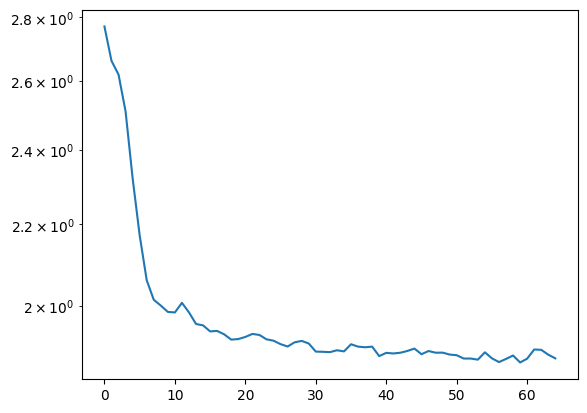

In [23]:
plt.plot(LAM.loss_history)
plt.yscale('log')

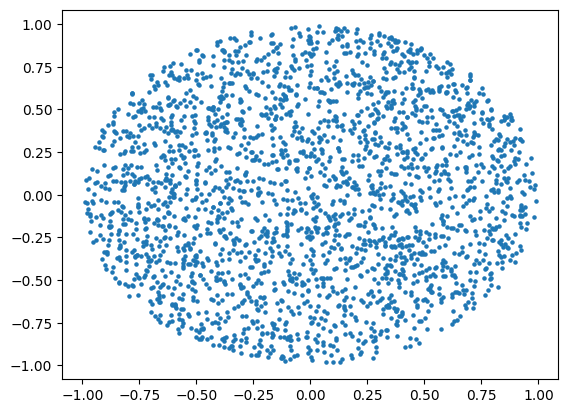

In [24]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [25]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0,  332, 2499,  548, 1292, 1086,  777, 1030,  708, 2262, 1024,
          711, 1869, 1563, 2222,  892, 1112, 1530, 2139,  811, 1036, 2340,
         1058, 2429,  791], dtype=int64)],
 [array([0.        , 0.00176674, 0.00233075, 0.00257921, 0.00280013,
         0.00284213, 0.00324932, 0.00342341, 0.00385993, 0.0040828 ,
         0.00408329, 0.00409995, 0.00424916, 0.00430236, 0.00432982,
         0.00433712, 0.00438384, 0.00443737, 0.0045735 , 0.00457665,
         0.00469165, 0.00477483, 0.0049649 , 0.00496519, 0.00500044])])

In [26]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0,  332, 2499,  548, 1292], dtype=int64),
  array([   2, 1554, 1565,  799, 1344], dtype=int64),
  array([   5, 1003, 1952, 1221,    6], dtype=int64)],
 [array([0.        , 0.00176674, 0.00233075, 0.00257921, 0.00280013]),
  array([0.        , 0.00170359, 0.00202134, 0.00205597, 0.00230766]),
  array([0.        , 0.00487714, 0.00901708, 0.00905937, 0.00910394])])

In [27]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

0.031953419325873256


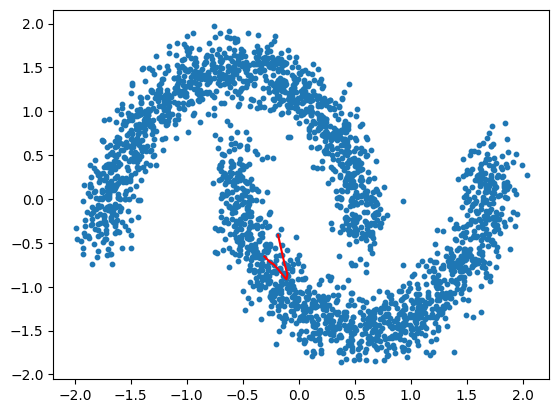

In [28]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

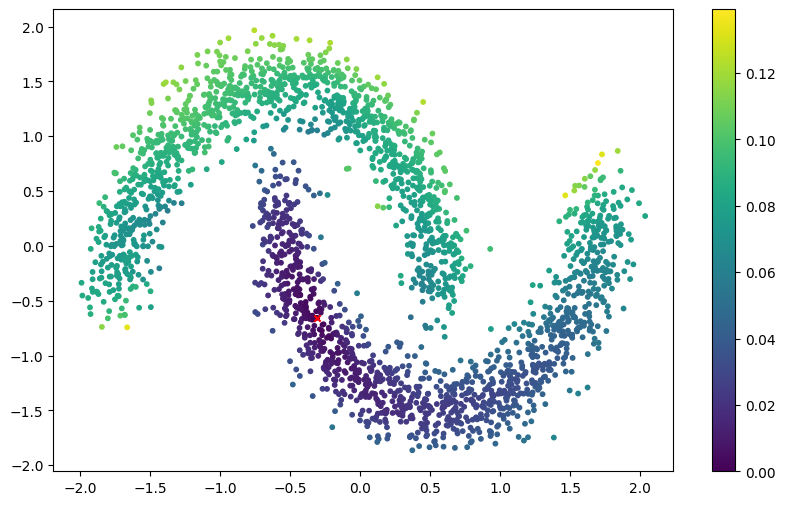

In [29]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()
